In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
df = pd.DataFrame(iris['data'], columns=iris.feature_names)
df["target"] = iris.target

In [5]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
X = df.drop("target",axis=1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [7]:
for col in X:
    ss = StandardScaler()
    X_train[col] = ss.fit_transform(X_train[[col]])
    X_test[col] = ss.transform(X_test[[col]])

In [8]:
neighbors = [3,5,7,9,11,13,15]

train_scores = []
test_scores = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    
    train_score = knn.score(X_train,y_train) 
    test_score = knn.score(X_test,y_test)
    
    train_scores.append(train_score)
    test_scores.append(test_score)

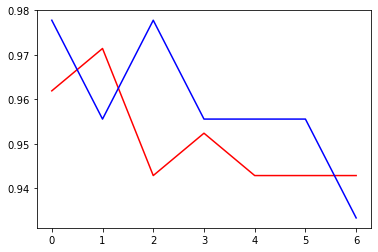

In [9]:
plt.figure()
plt.plot(train_scores, color="red")
plt.plot(test_scores, color="blue")
plt.show()

In [10]:
# Final model
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)

In [11]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.95      1.00      0.97        18
           2       1.00      0.92      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.98        45
weighted avg       0.98      0.98      0.98        45

